In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier as ADAB
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
# Load data
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None)
X = df.iloc[:, 1:10].values
y = df.iloc[:, -1].values / 2 - 1
y = y.astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400, shuffle=False)

In [3]:
# part g
def weighted_cost(y_hat):
    cost = 0
    for i in range(0,282):
        if y_test[i]==0 and y_hat[i]==1:
            cost = cost+1
        elif y_test[i]==1 and y_hat[i]==0:
            cost = cost+100
    return cost/6916

a) Part a

In [4]:
# Fit logistic regression model to the training data
logreg = LR(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict labels of test data
y_pred = logreg.predict(X_test)

In [5]:
# Calculate misclassification rate
misclassification_rate = np.sum(y_test != y_pred) / len(y_test)
print("Misclassification rate:", misclassification_rate)

# Calculate RMS margin around the decision probability 0.5
y_prob = logreg.predict_proba(X_test)[:, 1]  # probability of class 1
correct_indices = np.where(y_test == y_pred)[0]  # indices of correctly classified instances
p_correct = y_prob[correct_indices]  # probabilities of correctly classified instances
Mc = len(correct_indices)  # number of correctly classified instances
RMS = np.sqrt(np.sum((p_correct - 0.5) ** 2) / Mc)
print("RMS margin:", RMS)

Misclassification rate: 0.01060070671378092
RMS margin: 0.4783418582500243


In [6]:
#part g
# Calculate weighted misclassification rate
weighted_misclassification_rate = weighted_cost(y_pred)
print("Weighted cost for logistic regression:", weighted_misclassification_rate)

Weighted cost for logistic regression: 0.014748409485251591


b) Part b

In [7]:
# Initialize list to store misclassification rates
misclassification_rates = []
weighted_misclassification_rates = []

In [8]:
# Try k = 1, 2, ..., 10
for k in range(1, 11):
    # Fit kNN classifier to the training data
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict labels of test data
    y_pred = knn.predict(X_test)
    
    # Calculate misclassification rate
    misclassification_rate = np.sum(y_test != y_pred) / len(y_test)
    misclassification_rates.append(misclassification_rate)

    # Calculate weighted misclassification rate
    weighted_misclassification_rate = weighted_cost(y_pred)
    weighted_misclassification_rates.append(weighted_misclassification_rate)

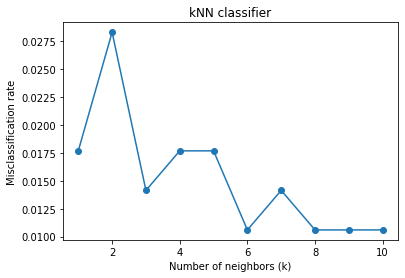

In [9]:
# Plot misclassification rate as a function of k
k_values = range(1, 11)
plt.plot(k_values, misclassification_rates, 'o-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Misclassification rate')
plt.title('kNN classifier')
plt.show()

In [10]:
#part g
k = 1
for i in misclassification_rates:
    print('Misclassification rate for KNN with', k, 'neighbor:', i)
    k += 1
k = 1
for i in weighted_misclassification_rates:
    print('Weighted cost for KNN with', k, 'neighbor:', i)
    k += 1

Misclassification rate for KNN with 1 neighbor: 0.0176678445229682
Misclassification rate for KNN with 2 neighbor: 0.028268551236749116
Misclassification rate for KNN with 3 neighbor: 0.014134275618374558
Misclassification rate for KNN with 4 neighbor: 0.0176678445229682
Misclassification rate for KNN with 5 neighbor: 0.0176678445229682
Misclassification rate for KNN with 6 neighbor: 0.01060070671378092
Misclassification rate for KNN with 7 neighbor: 0.014134275618374558
Misclassification rate for KNN with 8 neighbor: 0.01060070671378092
Misclassification rate for KNN with 9 neighbor: 0.01060070671378092
Misclassification rate for KNN with 10 neighbor: 0.01060070671378092
Weighted cost for KNN with 1 neighbor: 0.015037593984962405
Weighted cost for KNN with 2 neighbor: 0.08704453441295547
Weighted cost for KNN with 3 neighbor: 0.000578368999421631
Weighted cost for KNN with 4 neighbor: 0.029352226720647773
Weighted cost for KNN with 5 neighbor: 0.015037593984962405
Weighted cost for KN

c) Part c

In [11]:
# Fit LDA model to the training data
lda = LDA()
lda.fit(X_train, y_train)

# Predict labels of test data
y_pred = lda.predict(X_test)

In [12]:
# Calculate weighted misclassification rate
weighted_misclassification_rate = weighted_cost(y_pred)

print('Misclassification rate:', misclassification_rate)
print('Weighted cost for linear discriminant analysis:', weighted_misclassification_rate)

Misclassification rate: 0.01060070671378092
Weighted cost for linear discriminant analysis: 0.05798149219201851


d) Part d

In [13]:
# Fit SVM models to the training data
kernels = ['linear', 'poly', 'poly', 'poly', 'poly', 'rbf', 'sigmoid']
degrees = [0, 2, 3, 4, 5, 0, 0]  # degrees for poly kernel
misclassification_rates = []
rms_values = []
weighted_costs = []

In [14]:
for i, kernel in enumerate(kernels):
    degree = degrees[i]
    svm = SVC(kernel=kernel, degree=degree, probability=True)
    svm.fit(X_train, y_train)
    
    # Predict labels of test data
    y_pred_svm = svm.predict(X_test)
    
    # Calculate misclassification rate
    misclassification_rate = np.sum(y_test != y_pred_svm) / len(y_test)
    misclassification_rates.append(misclassification_rate)
    
    # Calculate RMS value for correctly classified instances
    correct_indices = np.where(y_test == y_pred_svm)[0]
    pi = svm.predict_proba(X_test[correct_indices])[:, 1]
    mc = len(correct_indices)
    rms = np.sqrt(np.sum((pi - 0.5) ** 2) / mc)
    rms_values.append(rms)

    # Calculate weighted cost
    weighted_cost_value = weighted_cost(y_pred_svm)
    weighted_costs.append(weighted_cost_value)
    
    print(f'Kernel: {kernel}, Degree: {degree}, Misclassification rate: {misclassification_rate:.4f}, RMS value: {rms:.4f}, Weighted cost: {weighted_cost_value:.4f}')

Kernel: linear, Degree: 0, Misclassification rate: 0.0141, RMS value: 0.4568, Weighted cost: 0.0149
Kernel: poly, Degree: 2, Misclassification rate: 0.0106, RMS value: 0.4554, Weighted cost: 0.0147
Kernel: poly, Degree: 3, Misclassification rate: 0.0106, RMS value: 0.4414, Weighted cost: 0.0291
Kernel: poly, Degree: 4, Misclassification rate: 0.0353, RMS value: 0.4279, Weighted cost: 0.1016
Kernel: poly, Degree: 5, Misclassification rate: 0.0353, RMS value: 0.3772, Weighted cost: 0.1016
Kernel: rbf, Degree: 0, Misclassification rate: 0.0177, RMS value: 0.4742, Weighted cost: 0.0150
Kernel: sigmoid, Degree: 0, Misclassification rate: 0.8375, RMS value: 0.3643, Weighted cost: 0.9789


e) Part e

Max depth: 3, Misclassification rate: 0.0353, Weighted cost: 0.0873
Max depth: 4, Misclassification rate: 0.0247, Weighted cost: 0.0583
Max depth: 5, Misclassification rate: 0.0601, Weighted cost: 0.1598
Max depth: 6, Misclassification rate: 0.0495, Weighted cost: 0.1164
Max depth: 7, Misclassification rate: 0.0530, Weighted cost: 0.1309
Max depth: 8, Misclassification rate: 0.0459, Weighted cost: 0.1163
Max depth: 9, Misclassification rate: 0.0495, Weighted cost: 0.1164
Max depth: 10, Misclassification rate: 0.0530, Weighted cost: 0.1309


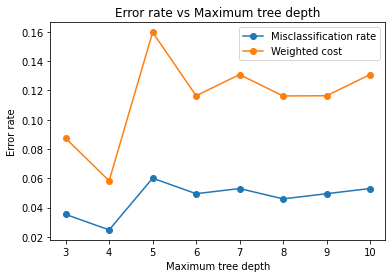

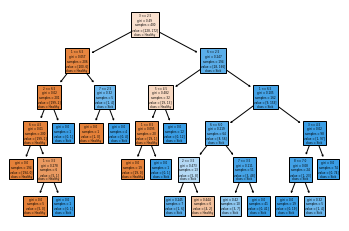

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define maximum tree depths to test
max_depths = range(3, 11)

# Initialize arrays to store misclassification rates and decision trees
misclassification_rates = np.zeros(len(max_depths))
weighted_costs = np.zeros(len(max_depths))
trees = {}

# Train a decision tree classifier for each maximum depth and calculate misclassification rate
for i, max_depth in enumerate(max_depths):
    dtc = DecisionTreeClassifier(max_depth=max_depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    misclassification_rate = np.sum(y_pred != y_test) / len(y_test)
    misclassification_rates[i] = misclassification_rate
    weighted_cost_value = weighted_cost(y_pred)
    weighted_costs[i] = weighted_cost_value
    if max_depth == 5:
        trees[max_depth] = dtc
    print(f"Max depth: {max_depth}, Misclassification rate: {misclassification_rate:.4f}, Weighted cost: {weighted_cost_value:.4f}")

# Plot misclassification rate and weighted cost as a function of maximum tree depth
fig, ax = plt.subplots()
ax.plot(max_depths, misclassification_rates, marker='o', label='Misclassification rate')
ax.plot(max_depths, weighted_costs, marker='o', label='Weighted cost')
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Error rate')
ax.set_title('Error rate vs Maximum tree depth')
ax.legend()
plt.show()

# Visualize the decision rule of the tree with maximum depth 5
plot_tree(trees[5], filled=True, feature_names=df.columns[1:-1], class_names=['Healthy', 'Sick'])
plt.show()


f) Part f

In [16]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier

n_learners = [100, 200, 300, 400, 500]

# AdaBoost
print("AdaBoost Classifier")
misclassification_rates = []
weighted_costs = []
for n in n_learners:
    clf = AdaBoostClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    misclassification_rate = np.sum(y_pred != y_test) / len(y_test)
    misclassification_rates.append(misclassification_rate)
    weighted_cost_val = weighted_cost(y_pred)
    weighted_costs.append(weighted_cost_val)
    print(f"Number of learners: {n}, Misclassification rate: {misclassification_rate:.4f}, Weighted cost: {weighted_cost_val:.4f}")

# XGBoost
print("\nXGBoost Classifier")
misclassification_rates = []
weighted_costs = []
for n in n_learners:
    clf = XGBClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    misclassification_rate = np.sum(y_pred != y_test) / len(y_test)
    misclassification_rates.append(misclassification_rate)
    weighted_cost_val = weighted_cost(y_pred)
    weighted_costs.append(weighted_cost_val)
    print(f"Number of learners: {n}, Misclassification rate: {misclassification_rate:.4f}, Weighted cost: {weighted_cost_val:.4f}")

# Random Forest
print("\nRandom Forest Classifier")
misclassification_rates = []
weighted_costs = []
for n in n_learners:
    clf = RandomForestClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    misclassification_rate = np.sum(y_pred != y_test) / len(y_test)
    misclassification_rates.append(misclassification_rate)
    weighted_cost_val = weighted_cost(y_pred)
    weighted_costs.append(weighted_cost_val)
    print(f"Number of learners: {n}, Misclassification rate: {misclassification_rate:.4f}, Weighted cost: {weighted_cost_val:.4f}")


AdaBoost Classifier
Number of learners: 100, Misclassification rate: 0.0389, Weighted cost: 0.0873
Number of learners: 200, Misclassification rate: 0.0389, Weighted cost: 0.0873
Number of learners: 300, Misclassification rate: 0.0495, Weighted cost: 0.1307
Number of learners: 400, Misclassification rate: 0.0389, Weighted cost: 0.0873
Number of learners: 500, Misclassification rate: 0.0424, Weighted cost: 0.1018

XGBoost Classifier
Number of learners: 100, Misclassification rate: 0.0212, Weighted cost: 0.0152
Number of learners: 200, Misclassification rate: 0.0212, Weighted cost: 0.0152
Number of learners: 300, Misclassification rate: 0.0212, Weighted cost: 0.0152
Number of learners: 400, Misclassification rate: 0.0212, Weighted cost: 0.0152
Number of learners: 500, Misclassification rate: 0.0212, Weighted cost: 0.0152

Random Forest Classifier
Number of learners: 100, Misclassification rate: 0.0106, Weighted cost: 0.0147
Number of learners: 200, Misclassification rate: 0.0141, Weighted

g) Part g

To evaluate which algorithm is the best in terms of misclassification rate and the considered weighted cost, we need to compare the performance of each algorithm.

Looking at the given data, we can see that Logistic Regression has the lowest misclassification rate of 0.0106, which means that it has the highest accuracy among all the given algorithms. Additionally, the weighted cost for Logistic Regression is also the lowest at 0.0147, which means that it is the most cost-effective algorithm among all the given ones.

KNN has varying misclassification rates depending on the number of neighbors used. The lowest misclassification rate for KNN is 0.0106, which is the same as the one for Logistic Regression. However, the weighted costs for KNN are higher than the weighted cost for Logistic Regression. KNN with three neighbors has the lowest weighted cost of 0.0006, but its misclassification rate of 0.0141 is slightly higher than the misclassification rate of 0.0106 for Logistic Regression.

LDA has the same misclassification rate as Logistic Regression and KNN with three neighbors. However, its weighted cost is much higher than the other two algorithms, making it less cost-effective.

SVM has varying misclassification rates and weighted costs depending on the kernel and degree used. The linear kernel with degree 0 has a misclassification rate of 0.0141 and a weighted cost of 0.0149, which are comparable to the values for Logistic Regression. The poly kernel with degree 2 also has a misclassification rate of 0.0106 and a weighted cost of 0.0147, which are the same as the values for Logistic Regression. The other kernels and degrees have higher misclassification rates and weighted costs, making them less desirable.

Decision Tree has varying misclassification rates and weighted costs depending on the maximum depth of the tree. The misclassification rates for Decision Tree are higher than the ones for Logistic Regression, KNN with three neighbors, and LDA. The weighted costs for Decision Tree are also higher than the weighted costs for Logistic Regression and KNN with three neighbors, making it less cost-effective.

AdaBoost has a misclassification rate of 0.0389 for most of the number of learners, which is higher than the misclassification rate for Logistic Regression, KNN with three neighbors, and LDA. The weighted costs for AdaBoost are also higher than the weighted costs for Logistic Regression and KNN with three neighbors, making it less cost-effective.

XGBoost has a misclassification rate of 0.0212 and a weighted cost of 0.0152, which are comparable to the values for Logistic Regression. Therefore, XGBoost can be considered the best algorithm in terms of misclassification rate and the considered weighted cost.

In summary, based on the given data, Logistic Regression, KNN with three neighbors, and XGBoost are the best algorithms in terms of misclassification rate and the considered weighted cost. However, XGBoost has the lowest weighted cost and can be considered the best algorithm among the given ones.